# Quick comparison of model matrices produced by my script vs GUI

I'm getting unmixing results that are almost exactly the same, but not quite

In [1]:
import os
import cPickle

import numpy as np
import matplotlib.pyplot as plt

import src.simple_image_registration as sir

## Load data

In [2]:
root_path = '/media/sam/SamData/FlyDB/Fly0059'
script_folder = 'script_model_matrix_and_images'
gui_folder = 'francesca_gui_model_matrix_and_images'

data_fn = 'data_dict.cpkl'

In [3]:
# load pickle files
with open(os.path.join(root_path, script_folder, data_fn), 'rb') as f:
    script_dict = cPickle.load(f)
    
with open(os.path.join(root_path, gui_folder, data_fn), 'rb') as f:
    gui_dict = cPickle.load(f)

In [4]:
# make sure we have matching data sets 
print(script_dict['model_mat'].shape)
print(gui_dict['model_mat'].shape)

(16, 97200)
(16, 97200)


## Visualize model matrices

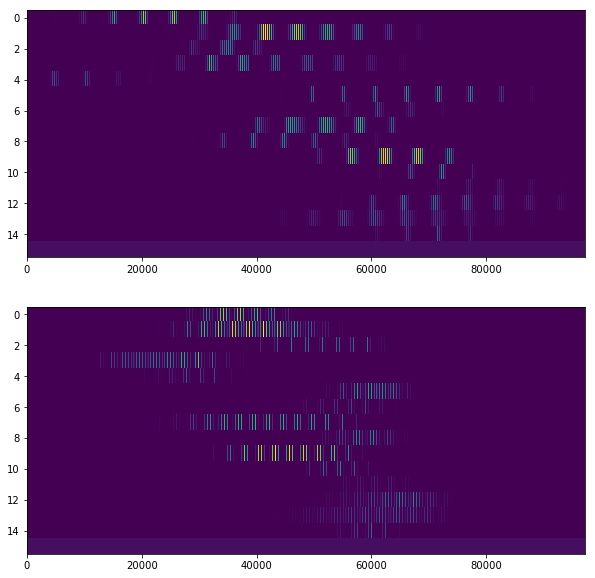

In [5]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))

ax1.imshow(script_dict['model_mat'], aspect='auto')
ax2.imshow(gui_dict['model_mat'], aspect='auto')

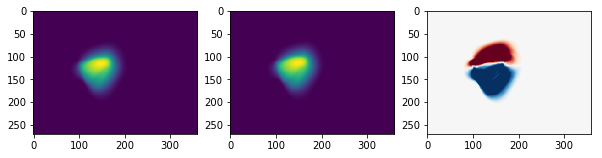

In [6]:
# see what happens when we try to get them back into image form
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,10))

script_b2 = script_dict['model_mat'][1,:].reshape((270, 360))
gui_b2 = np.flipud(gui_dict['model_mat'][1,:].reshape((360,270)).T)
b2_diff = script_b2 - gui_b2

ax1.imshow(script_b2)
ax2.imshow(gui_b2)
ax3.imshow(b2_diff, vmin=-0.5, vmax=0.5, cmap='RdBu')

In [7]:
# can we get the two images to line up?
[shiftedBackImage, colShift, rowShift, phaseDiff] = sir.register_images(script_b2, gui_b2)

print(colShift)
print(rowShift)

0
2


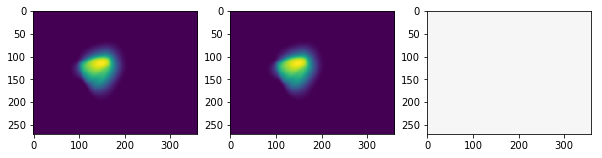

In [19]:
# visualize shifted image
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,10))

script_b2 = script_dict['model_mat'][1,:].reshape((270, 360))
gui_b2 = shiftedBackImage #  np.flipud(gui_dict['model_mat'][1,:].reshape((360,270)).T)
b2_diff = script_b2 - gui_b2

ax1.imshow(script_b2)
ax2.imshow(gui_b2)
ax3.imshow(b2_diff, vmin=-0.5, vmax=0.5, cmap='RdBu')